## METAR

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr

In [126]:
metar_data = pd.read_csv('data/metar_msg_overview.csv')

In [127]:
# Convert issued_at to datetime
metar_data['issued_at'] = pd.to_datetime(metar_data['issued_at'])

In [128]:
metar_data

,airport_identifier,issued_at,metar,metartype
0,ENDR,2021-01-01 00:20:00,ENDR 010020Z 14007KT 03/M02 Q1006=,AUTO
1,ENZV,2021-01-01 00:20:00,ENZV 010020Z 13006KT 9999 SCT026 BKN035 03/01 ...,NaN
2,ENTC,2021-01-01 00:20:00,ENTC 010020Z 21015KT CAVOK 02/M03 Q1013 RMK WI...,NaN
3,ENSB,2021-01-01 00:20:00,ENSB 010020Z 24004KT 9999 -SN FEW009 BKN033 M0...,NaN
4,ENGM,2021-01-01 00:20:00,ENGM 010020Z 36006KT 9999 4900E -SN FEW009 OVC...,NaN
...,...,...,...,...
3275708,ENLA,2023-12-31 23:50:00,ENLA 312350Z 11021KT 9999NDV BKN036/// 07/06 Q...,AUTO
3275709,ENUS,2023-12-31 23:50:00,ENUS 312350Z 10033G43KT 9999NDV BKN022/// 00/M...,AUTO
3275710,ENOL,2023-12-31 23:50:00,ENOL 312350Z 12029G41KT 9999 DRSN NSC M03/M09 ...,NaN
3275711,ENWV,2023-12-31 23:50:00,ENWV 312350Z 14019KT 9999NDV SCT014/// OVC037/...,AUTO


### Round to each whole hour for METAR and then remove duplicates

In [141]:
metar_data_xarray = xr.Dataset.from_dataframe(metar_data)

In [142]:
metar_data_xarray

<xarray.Dataset>
Dimensions:             (index: 3275713)
Coordinates:
  * index               (index) int64 0 1 2 3 ... 3275710 3275711 3275712
Data variables:
    airport_identifier  (index) object 'ENDR' 'ENZV' 'ENTC' ... 'ENWV' 'ENHO'
    issued_at           (index) datetime64[ns] 2021-01-01T00:20:00 ... 2023-1...
    metar               (index) object 'ENDR 010020Z 14007KT 03/M02 Q1006=' ....
    metartype           (index) object 'AUTO' nan nan nan ... nan 'AUTO' nan

In [143]:
metar_data_xarray['rounded_issued_at'] = metar_data_xarray['issued_at'].dt.round('H')

In [144]:
metar_data_xarray.head(200)

<xarray.Dataset>
Dimensions:             (index: 200)
Coordinates:
  * index               (index) int64 0 1 2 3 4 5 6 ... 194 195 196 197 198 199
Data variables:
    airport_identifier  (index) object 'ENDR' 'ENZV' 'ENTC' ... 'ENQA' 'ENHM'
    issued_at           (index) datetime64[ns] 2021-01-01T00:20:00 ... 2021-0...
    metar               (index) object 'ENDR 010020Z 14007KT 03/M02 Q1006=' ....
    metartype           (index) object 'AUTO' nan nan ... 'AUTO' 'AUTO' 'AUTO'
    rounded_issued_at   (index) datetime64[ns] 2021-01-01 ... 2021-01-01T02:0...

In [145]:
metar_data_pandas = metar_data_xarray.to_dataframe()

In [147]:
metar_data_pandas.head(100)

,airport_identifier,issued_at,metar,metartype,rounded_issued_at
index,,,,,
0,ENDR,2021-01-01 00:20:00,ENDR 010020Z 14007KT 03/M02 Q1006=,AUTO,2021-01-01 00:00:00
1,ENZV,2021-01-01 00:20:00,ENZV 010020Z 13006KT 9999 SCT026 BKN035 03/01 ...,NaN,2021-01-01 00:00:00
2,ENTC,2021-01-01 00:20:00,ENTC 010020Z 21015KT CAVOK 02/M03 Q1013 RMK WI...,NaN,2021-01-01 00:00:00
3,ENSB,2021-01-01 00:20:00,ENSB 010020Z 24004KT 9999 -SN FEW009 BKN033 M0...,NaN,2021-01-01 00:00:00
4,ENGM,2021-01-01 00:20:00,ENGM 010020Z 36006KT 9999 4900E -SN FEW009 OVC...,NaN,2021-01-01 00:00:00
...,...,...,...,...,...
95,ENAL,2021-01-01 01:20:00,ENAL 010120Z 08005KT 9999 FEW027/// SCT040/// ...,AUTO,2021-01-01 01:00:00
96,ENCN,2021-01-01 01:20:00,ENCN 010120Z 04003KT 2900 OVC059/// M01/M02 Q1...,AUTO,2021-01-01 01:00:00
97,ENHD,2021-01-01 01:20:00,ENHD 010120Z 10007KT 8000 NCD 02/01 Q1002=,AUTO,2021-01-01 01:00:00


In [148]:
metar_data_pandas= metar_data_pandas.drop_duplicates(subset=['airport_identifier', 'rounded_issued_at']).reset_index(drop=True)

In [149]:
metar_data_pandas.head(100)

,airport_identifier,issued_at,metar,metartype,rounded_issued_at
0,ENDR,2021-01-01 00:20:00,ENDR 010020Z 14007KT 03/M02 Q1006=,AUTO,2021-01-01 00:00:00
1,ENZV,2021-01-01 00:20:00,ENZV 010020Z 13006KT 9999 SCT026 BKN035 03/01 ...,NaN,2021-01-01 00:00:00
2,ENTC,2021-01-01 00:20:00,ENTC 010020Z 21015KT CAVOK 02/M03 Q1013 RMK WI...,NaN,2021-01-01 00:00:00
3,ENSB,2021-01-01 00:20:00,ENSB 010020Z 24004KT 9999 -SN FEW009 BKN033 M0...,NaN,2021-01-01 00:00:00
4,ENGM,2021-01-01 00:20:00,ENGM 010020Z 36006KT 9999 4900E -SN FEW009 OVC...,NaN,2021-01-01 00:00:00
...,...,...,...,...,...
95,ENDU,2021-01-01 01:50:00,ENDU 010150Z 11013KT 9999 NCD 00/M05 Q1013 RMK...,AUTO,2021-01-01 02:00:00
96,ENGM,2021-01-01 01:50:00,ENGM 010150Z 36006KT 9999 6000 R19R/P2000N R01...,NaN,2021-01-01 02:00:00
97,ENVA,2021-01-01 01:50:00,ENVA 010150Z 12008KT CAVOK M07/M08 Q1007 RMK W...,NaN,2021-01-01 02:00:00
98,ENAL,2021-01-01 01:50:00,ENAL 010150Z 09006KT 9999 BKN025/// M01/M02 Q1...,AUTO,2021-01-01 02:00:00


In [151]:
# Sort data based on airport and timestamp
metar_data_pandas.sort_values(['airport_identifier', 'issued_at'], inplace=True)

# Set airport and issued_at as index
metar_data_pandas.set_index(['airport_identifier', 'issued_at'], inplace=True)

# Group by airport
metar_data_pandas.groupby(['airport_identifier'])

In [152]:
# Replace NaN with MANUAL
metar_data_pandas['metartype'].fillna('MANUAL', inplace=True)

In [153]:
metar_data_pandas

metar  \
airport_identifier issued_at                                                                
ENAL               2021-01-01 00:20:00  ENAL 010020Z 08005KT 9999 SCT024/// BKN037/// ...   
                   2021-01-01 00:50:00  ENAL 010050Z 09006KT 9999 FEW025/// 00/M02 Q1006=   
                   2021-01-01 01:50:00  ENAL 010150Z 09006KT 9999 BKN025/// M01/M02 Q1...   
                   2021-01-01 02:50:00  ENAL 010250Z 10005KT 9999 OVC029/// 00/M02 Q1006=   
                   2021-01-01 03:50:00  ENAL 010350Z VRB03KT 9999 OVC024/// 02/M01 Q1006=   
...                                                                                   ...   
ENZV               2023-12-31 19:50:00           ENZV 311950Z 10017KT CAVOK 05/M04 Q0994=   
                   2023-12-31 20:50:00           ENZV 312050Z 10018KT CAVOK 05/M04 Q0994=   
                   2023-12-31 21:50:00           ENZV 312150Z 10022KT CAVOK 05/M05 Q0994=   
                   2023-12-31 22:50:00           ENZV 312250Z 10021KT CAVOK 05/M04 Q0994=   
                   2023-12-31 23:50:00        ENZV 312350Z 11025G37KT CAVOK 04/M05 Q0995=   

                                       metartype   rounded_issued_at  
airport_identifier issued_at                                          
ENAL               2021-01-01 00:20:00      AUTO 2021-01-01 00:00:00  
                   2021-01-01 00:50:00      AUTO 2021-01-01 01:00:00  
                   2021-01-01 01:50:00      AUTO 2021-01-01 02:00:00  
                   2021-01-01 02:50:00      AUTO 2021-01-01 03:00:00  
                   2021-01-01 03:50:00      AUTO 2021-01-01 04:00:00  
...                                          ...                 ...  
ENZV               2023-12-31 19:50:00    MANUAL 2023-12-31 20:00:00  
                   2023-12-31 20:50:00    MANUAL 2023-12-31 21:00:00  
                   2023-12-31 21:50:00    MANUAL 2023-12-31 22:00:00  
                   2023-12-31 22:50:00    MANUAL 2023-12-31 23:00:00  
                   2023-12-31 23:50:00    MANUAL 2024-01-01 00:00:00  

[1685968 rows x 3 columns]

In [64]:
#Extract the minute component
metar_data['minute'] = metar_data['issued_at'].dt.minute

# Identify outliers
outliers_mask = ~metar_data['minute'].isin([20, 50])
outliers = metar_data[outliers_mask]

# Retrieve the actual values of outliers
outlier_values = metar_data.loc[outliers_mask, 'issued_at']



array(['2021-01-01T07:58:00.000000000', '2021-01-01T12:40:00.000000000',
       '2021-01-01T16:45:00.000000000', ...,
       '2023-12-30T09:27:00.000000000', '2023-12-31T05:59:00.000000000',
       '2023-12-31T15:33:00.000000000'], dtype='datetime64[ns]')

/modules/rhel8/conda/install/envs/development-11-2023/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


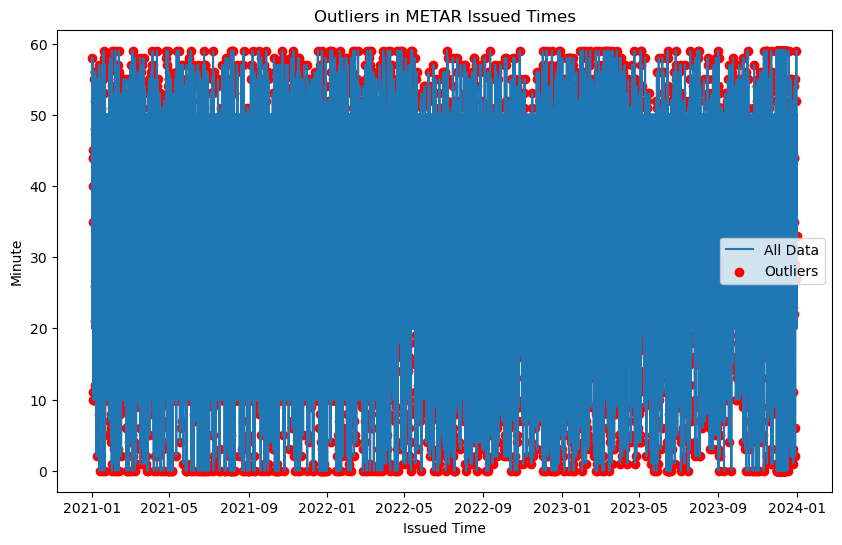

In [68]:
plt.figure(figsize=(10, 6))
plt.plot(metar_data['issued_at'], metar_data['minute'], label='All Data')
plt.scatter(outlier_values, outlier_values.dt.minute, color='red', label='Outliers')
plt.title('Outliers in METAR Issued Times')
plt.xlabel('Issued Time')
plt.ylabel('Minute')
plt.legend()
plt.show()

In [82]:

# Pviolinplotxplot with Seaborn
plt.figure(figsize=(10, 6))

# Plot boxplot for all data
sns.boxplot(x=metar_data['minute'], color='skyblue', width=0.4)

# Plot swarmplot for outliers
sns.swarmplot(x=outlier_values, color='red', size=5)

plt.title('Boxplot of Minute Values in METAR Issued Times with Outliers')
plt.xlabel('Minute')

plt.show()

/modules/rhel8/conda/install/envs/development-11-2023/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 87.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/modules/rhel8/conda/install/envs/development-11-2023/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 94.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)

KeyboardInterrupt



<AxesSubplot: xlabel='issued_at', ylabel='minute'>

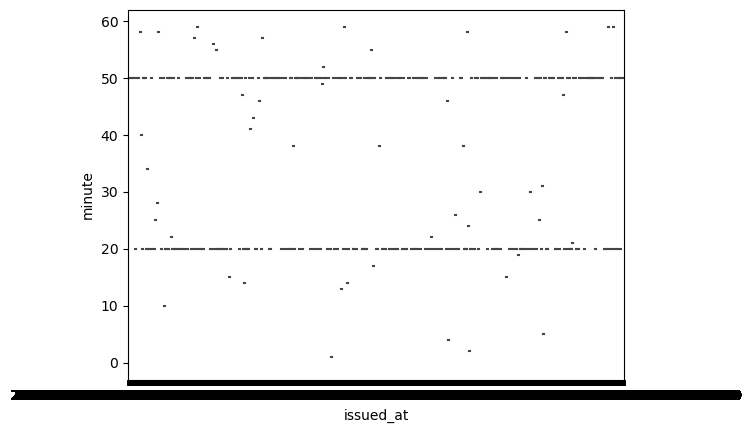

In [83]:
sns.violinplot(data=metar_data, x='issued_at', y=metar_data['minute'])